<a href="https://colab.research.google.com/github/JohnCordero1/Machine-Learning/blob/main/2_2_Regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Existe un *trade off* entre sesgo y varianza, modelos más complejos tienden a tener menor sesgo pero mayor varianza. Por lo tanto para la mejor elección del modelo se debe buscar el modelo que mejor prediga fuera de la muestra.

Sin embargo estimar todos los posibles modelos es costoso, con $k = 1, ..., p$ predictores, se tendra $2^p$ modelos, por ejemplo con 10 variables predictoras tendremos que estimar 1024 modelos, sin duda es un trabajo computacional inviable.

Una técnica usada para determinar los regresores de relevancia son las técnicas de regularización. Donde se empieza con un modelo general y se anula los coeficientes no significativos.

Junto a esto, las técnicas de regularización nos pueden ayudar a lidiar con los outlayers que podrian tener nuestro conjunto de datos

Consideremos el siguiente ejemplo:

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")

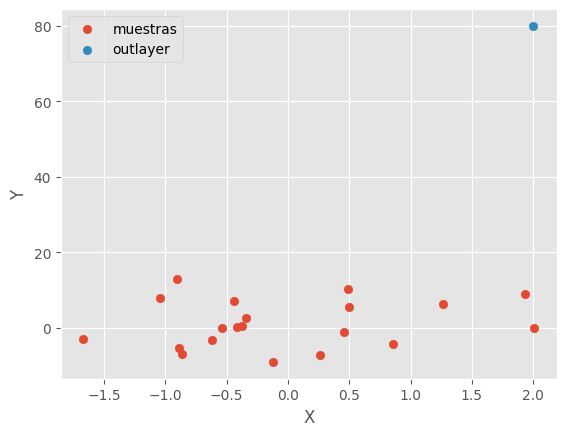

In [7]:
#Conjunto de datos
n_samples = 20
n_outlayers = 1

X, y = make_regression(n_samples=n_samples, n_features=1, n_informative=1, n_targets=1, noise=5, random_state=43)

X_outlayers = np.array([[2]])
y_outlayers = np.array([80])

X = np.vstack((X, X_outlayers))
y = np.hstack((y, y_outlayers))

#Grafico
plt.figure()
plt.scatter(X[:n_samples, 0], y[:n_samples], zorder=10, label="muestras")
plt.scatter(X[n_samples:, 0], y[n_samples:], zorder=10, label="outlayer")
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.show()

La regresión lineal aplicada a este conjunto de datos dará como resultado el siguiente modelo de regresión:

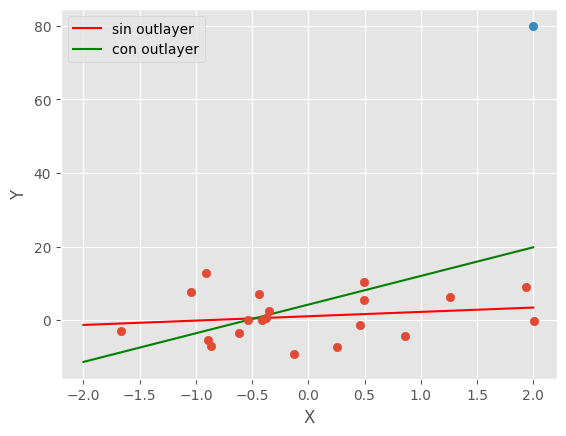

In [11]:
from sklearn.linear_model import LinearRegression

#Grafico
plt.figure()
plt.scatter(X[:n_samples, 0], y[:n_samples], zorder=10)
plt.scatter(X[n_samples:, 0], y[n_samples:], zorder=10)

##Regresion sin outlayers
reg = LinearRegression()
results = reg.fit(X[:n_samples,:], y[:n_samples])
x_range = np.linspace(-2, 2, num=100)
plt.plot(x_range, results.intercept_ + results.coef_[0] * x_range, color="red", label="sin outlayer")

##Regresion con outlayers
reg_outlayers = LinearRegression()
results2 = reg_outlayers.fit(X, y)
x_range = np.linspace(-2, 2, num=100)
plt.plot(x_range, results2.intercept_ + results2.coef_[0] * x_range, color="green", label="con outlayer")

plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.show()

# Lasso regression

Para $λ \ge 0$ dado. Consideremos la siguiente función objetivo a minimizar:
$$R_l (\beta) = \sum_{i=1}^n (y_i - x_i' \beta)^2 + λ ∑_{s=2}^p |\beta_s|$$
Donde el primer coeficiente corresponde al intercepto.

De esta expresión podemos sacar algunas consideraciones:
- Si $\lambda = 0$ estariamos en el problema de los Mínimos Cuadrados Ordinarios.
- Si $\lambda = \infty$ todos los $\beta_i$ (excepto el intercapeto) serían igual a cero.
- $\sum_{i=1}^n (y_i - x_i' \beta)^2$ penaliza parte del ajuste.
- $∑_{s=2}^p |\beta_s|$ penaliza la complejidad de las variables.
- $\lambda$ es un hiperparámetro del modelo.

El problema es una función no diferenciable, para resolver este problema de optimización es necesario emplear el análisis convexo; sin embargo podemos dar algunas breves conclusiones:
- Lasso es un método de estimación sesgado, pero reduce la variabilidad.
- Eliminará automáticamente las variables que tengan asociados un $\beta_i = 0$.
- Los coeficientes no grandes se anularan como "coeficientes de esquina".
- Como se menciono, MCO se ve afectado por los outlayers, una forma de remediarlo es mediante Lasso.

A continuación podemos observar como Lasso nos ayuda con el problema de los autayers:

<ipython-input-16-e7c2339464d2>:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  results2 = lasso.fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.677e+03, tolerance: 6.709e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


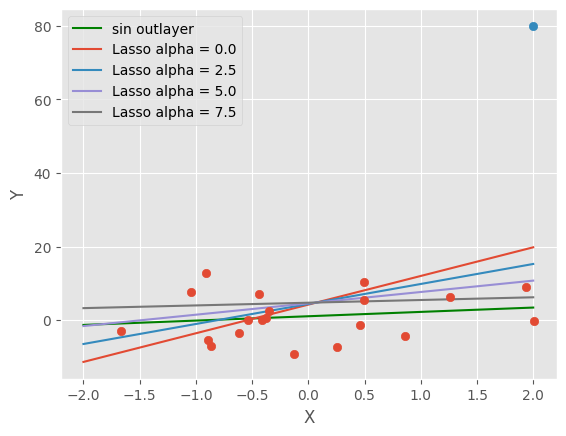

In [16]:
# Ejemplo
from sklearn.linear_model import Lasso

#Grafico
plt.figure()
plt.scatter(X[:n_samples, 0], y[:n_samples], zorder=10)
plt.scatter(X[n_samples:, 0], y[n_samples:], zorder=10)

##Regresion sin outlayers
reg = LinearRegression()
results = reg.fit(X[:n_samples,:], y[:n_samples])
x_range = np.linspace(-2, 2, num=100)
plt.plot(x_range, results.intercept_ + results.coef_[0] * x_range, color="green", label="sin outlayer")

##Regresion con outlayers
for alpha in np.arange(0,10,2.5):
    lasso = Lasso(alpha=alpha)
    results2 = lasso.fit(X, y)
    x_range = np.linspace(-2, 2, num=100)
    plt.plot(x_range, results2.intercept_ + results2.coef_[0] * x_range, label= "Lasso alpha = " + str(alpha))

plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.show()

# Ridge regression

Para $λ \ge 0$ dado. Consideremos la siguiente función objetivo a minimizar:
$$R_r (\beta) = \sum_{i=1}^n (y_i - x_i' \beta)^2 + λ ∑_{s=2}^p (\beta_s)^2$$
Donde el primer coeficiente corresponde al intercepto.

Las intuiciones coinciden con Lasso, pero con algunas diferentes conclusiones:
- La solución siempre es interior. donde esta solución esta "corrida hacia cero" con respecto a $\beta$ (sesgado).
- Ridge a diferencia de Lasso no elimina variables

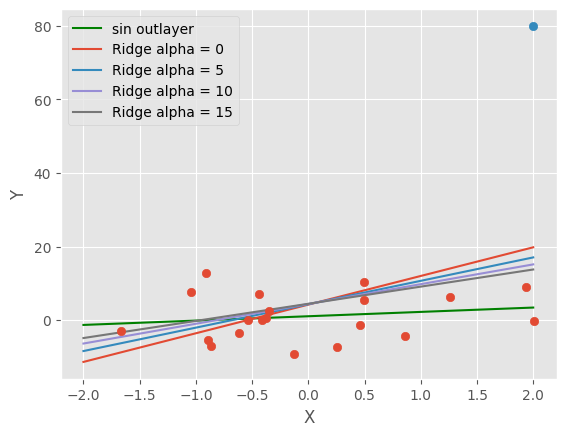

In [17]:
# Ejemplo
from sklearn.linear_model import Ridge

#Grafico
plt.figure()
plt.scatter(X[:n_samples, 0], y[:n_samples], zorder=10)
plt.scatter(X[n_samples:, 0], y[n_samples:], zorder=10)

##Regresion sin outlayers
reg = LinearRegression()
results = reg.fit(X[:n_samples,:], y[:n_samples])
x_range = np.linspace(-2, 2, num=100)
plt.plot(x_range, results.intercept_ + results.coef_[0] * x_range, color="green", label="sin outlayer")

##Regresion con outlayers
for alpha in np.arange(0,20,5):
    ridge = Ridge(alpha=alpha)
    results3 = ridge.fit(X, y)
    x_range = np.linspace(-2, 2, num=100)
    plt.plot(x_range, results3.intercept_ + results3.coef_[0] * x_range, label= "Ridge alpha = " + str(alpha))

plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.show()

# Elastic Net

Elastic Net es otra forma de aplicar regularización, pero generalizando los dos anteriores modelos de regresión. Con esto lo que se busca es adoptar las mejores propiedades de cada modelo y solucionar algunos problemas.

Es decir:
- Cuando $p>n$, es decir el número de parámetros es mayor a las observaciones, Lasso elige como máximo $n$ variables.
- Cuando un grupo de variables esta altamente correlacionadas, Lasso tienda a elegir una sola variable arbitrariamente, Ridge no tiene problemas con esta situación.
Ridge tiende a funcionar mucho mejor que Lasso en términos del Error Cudrático Medio.

Elastic Net solcuiona estos problemas, ya que predice bien, reduce la dimensionalidad y elige correctamente el grupo de variables.

# Naive Elastic Net

$$R_{nen} (\beta) = \sum_{i=1}^n (y_i - x_i' \beta)^2 + λ_2 ∑_{s=2}^p (\beta_s)^2$ + λ_1 ∑_{s=2}^p |\beta_s|$$

Naive Elastic Net mescla Ridge y Lasso, la parte de Lasso se encargará de elegir los predictores, la concavidad estricta de la penalidad de Ridge resuelve el problemas de inestabilidad por agrupamiento.

Y la versión reescalada es:
$$\hat{\beta}_{en} = \frac{1}{\sqrt{1+\lambda_2}} \hat{\beta}_{nen}$$
Donde elimina el doble "encogimiento" de Ridge (demasiado sesgo)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.683e+03, tolerance: 6.709e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.236e+03, tolerance: 6.709e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

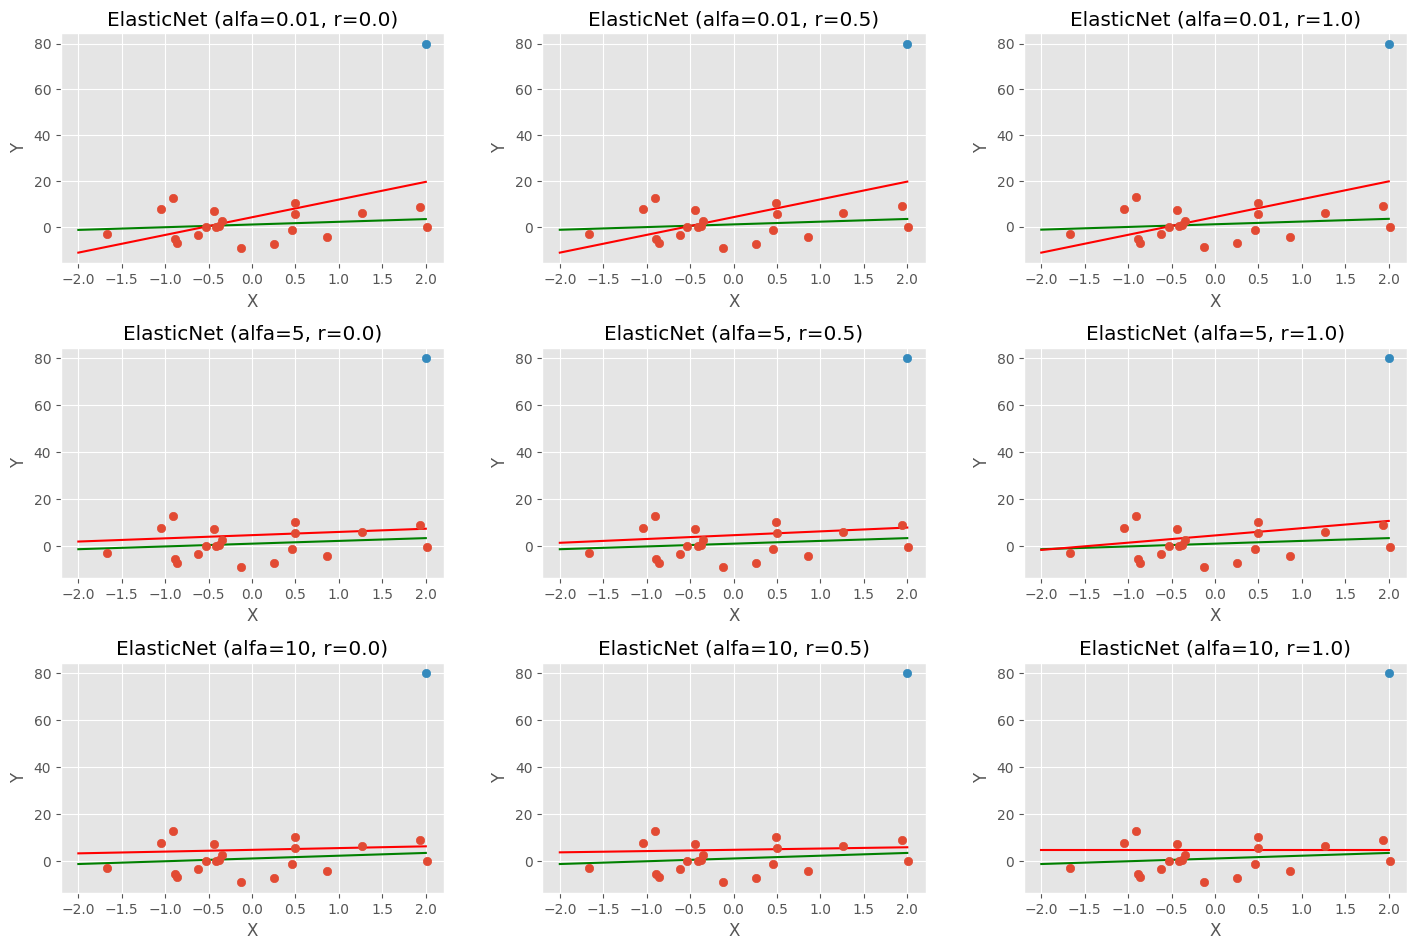

In [22]:
# Ejemplo
from sklearn.linear_model import ElasticNet

def plot_regression(ax, alpha, r):
    x_range = np.linspace(-2, 2, num=100)
    ax.set_title('ElasticNet (alfa=' + str(alpha) + ', r=' + str(r) +  ')')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    x_range = np.linspace(-2, 2, num=100)
    #muestras
    ax.scatter(X[:n_samples, 0], y[:n_samples], zorder=10)
    ax.scatter(X[n_samples:, 0], y[n_samples:], zorder=10)

    # Regresion sin outlayers
    reg = LinearRegression()
    results = reg.fit(X[:n_samples,:], y[:n_samples])
    ax.plot(x_range, results.intercept_ + results.coef_[0] * x_range, color="green")

    # Elastic Net
    elastic = ElasticNet(alpha=alpha, l1_ratio=r)
    results3 = elastic.fit(X,y)
    ax.plot(x_range, results3.intercept_ + results3.coef_ * x_range, color="red")

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
fig.tight_layout(pad=4.0)

plot_regression(axs[0][0], 0.01, 0.0)
plot_regression(axs[0][1], 0.01, 0.5)
plot_regression(axs[0][2], 0.01, 1.0)

plot_regression(axs[1][0], 5, 0.0)
plot_regression(axs[1][1], 5, 0.5)
plot_regression(axs[1][2], 5, 1.0)

plot_regression(axs[2][0], 10, 0.0)
plot_regression(axs[2][1], 10, 0.5)
plot_regression(axs[2][2], 10, 1.0)